In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Example formatting in HTML - This is a big headline!</h1>
<h2>Edit this cell to see them - This is a smaller headline<h2>
<hr>
<b>Things can be bold....</b>

<i>Or italic</i>
<ul>
<li>Things can be in a list
<li>all sorts of things!
</ul>

<ol>
<li>Lists can have numbers
<li>they count automatically!
</ol>



<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


<hr>
<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1
dfLE["GDP/capita"] = " "
dfLE["GDP/capita"] = (dfLE["GDP"]*1000000000) / dfLE["Population"]
dfLE.head(15)
#GDP units are in billons of dollars. Convert to regular dollars.

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,3.409613e+04
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,3.041600e+06
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,1.315416e+05
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,1.946510e+05
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625,3.478209e+05
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750,1.970110e+06
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,7.551230e+06
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,5.224418e+06
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000,1.531006e+06


<hr>
<h2>Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)</h2>
Print each distribution in some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options
<li>5 points are for doing it in an efficient way - just listing off each column is lots of typing...
</ul>

In [56]:
#Print all distributions
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    data = data.apply (pd.to_numeric, errors='coerce')
    data = data.dropna()

    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(5, rows =2, cols=3)
    thinkplot.Hist(hist)
    plt.title('Histogram')
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    plt.title('PMF')
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    plt.title('CDF')
    thinkplot.SubPlot(4)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    plt.title('PDF')
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(data)
    plt.title('Normal Probability')
    thinkplot.Config()

    sns.displot(data=df_in, x=columnName, kde=True, col="isDeveloped")

    return

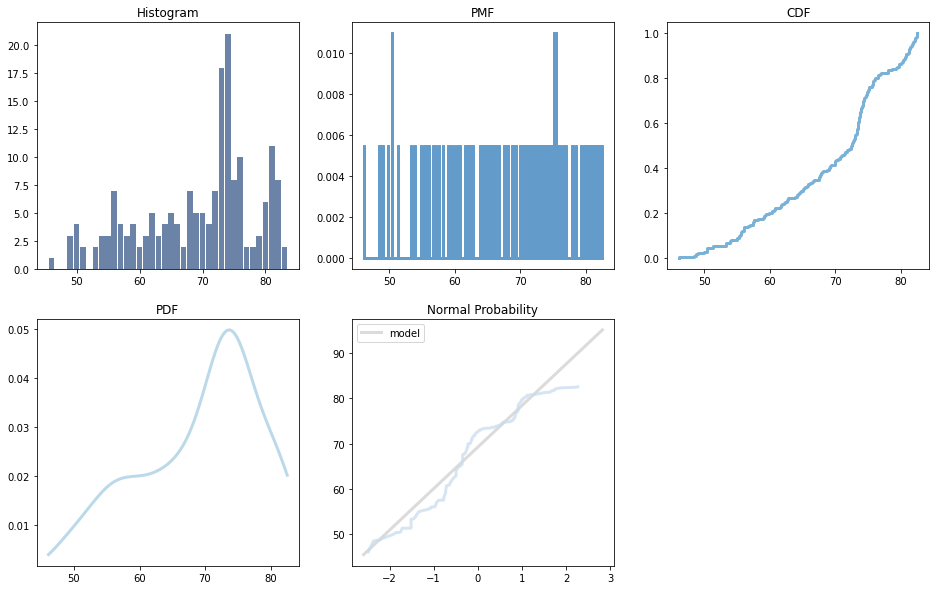

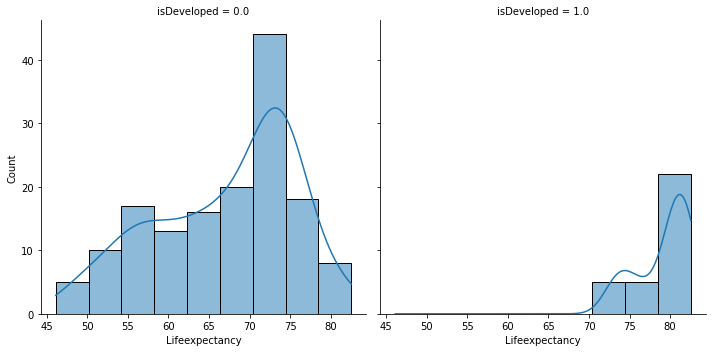

In [57]:
# Create histogram, PMF, CDF, PDF, Normal Probability, and KDE for both developed and developing nations.
bigGraph(dfLE, 'Lifeexpectancy')

<h2>Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it without using a fit() method. Plot the emperical data on the same graph. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

In [4]:
dfLE.head(15)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,3.409613e+04
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,3.041600e+06
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,1.315416e+05
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,1.946510e+05
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625,3.478209e+05
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750,1.970110e+06
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,7.551230e+06
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,5.224418e+06
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000,1.531006e+06


count    178.000000
mean      12.027739
std        3.104852
min        1.531250
25%        9.971875
50%       12.359375
75%       14.093750
max       20.037500
Name: Schooling, dtype: float64


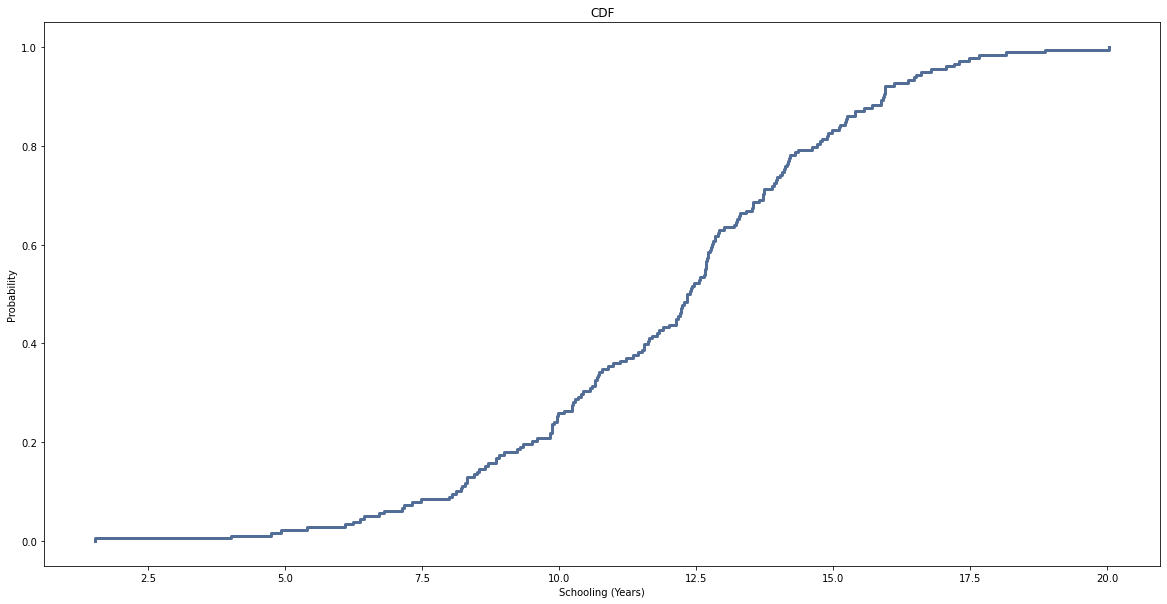

In [61]:
# CDF for Schooling
print(dfLE['Schooling'].describe(include='all'))
cdf_schooling = thinkstats2.Cdf(dfLE['Schooling'])
thinkplot.Cdf(cdf_schooling)
plt.title('CDF')
plt.ylabel('Probability')
plt.xlabel('Schooling (Years)')
thinkplot.Config()

In [70]:
# Average schooling for Canada is 15.875 years.
cdf_schoolingLow = cdf_schooling.Prob(14.875)
cdf_schoolingHigh = cdf_schooling.Prob(16.875)

print(cdf_schoolingLow , cdf_schoolingHigh)

rng_schooling = cdf_schoolingHigh - cdf_schoolingLow
rng_schooling = round(rng_schooling * 100, 2)
print('The percentage of nations within 1 year of schooling compared to Canada (15.875 yrs) is : ', rng_schooling)

0.8146067415730337 0.9550561797752809
The percentage of nations within 1 year of schooling compared to Canada (15.875 yrs) is :  14.04


<hr>
<h2>Part 3: Create another analytical distribution for GDP per Capita (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

C:\Users\hare_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


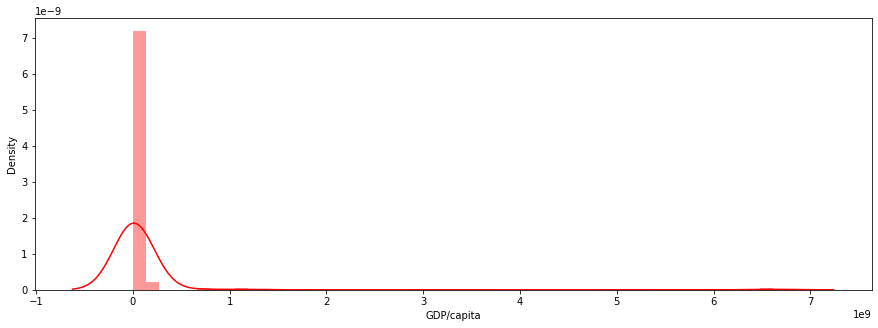

In [6]:
#Analytical for GDP/capita
sns.distplot(dfLE["GDP/capita"], color="red")
#real values
plt.show()

<h2><b>This creates an unreliable visulaization of the distribution. Take the log of the data set to create a better distribution.</b><h2>

C:\Users\hare_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


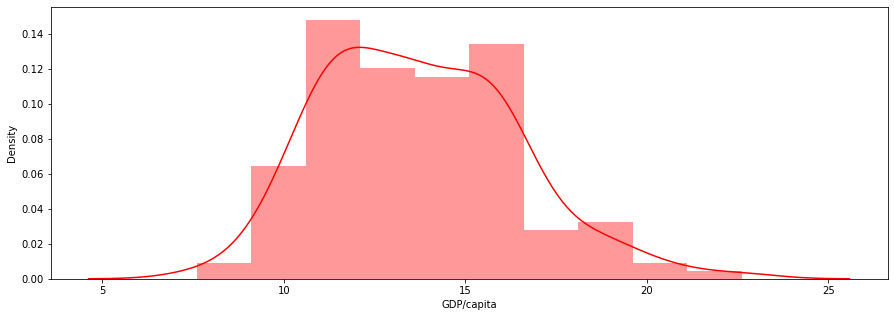

In [7]:
#Analytical for GDP/capita
sns.distplot(np.log(dfLE["GDP/capita"]), color="red")
#real values
plt.show()

<h2>This creates a readable distribution of the data set in log scale. This could be considered as a lognormal distribution.<h2>
<il>
I would say this distribution would be considered accurate.
<il>
<hr>

<h2>Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)</h2>
<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 

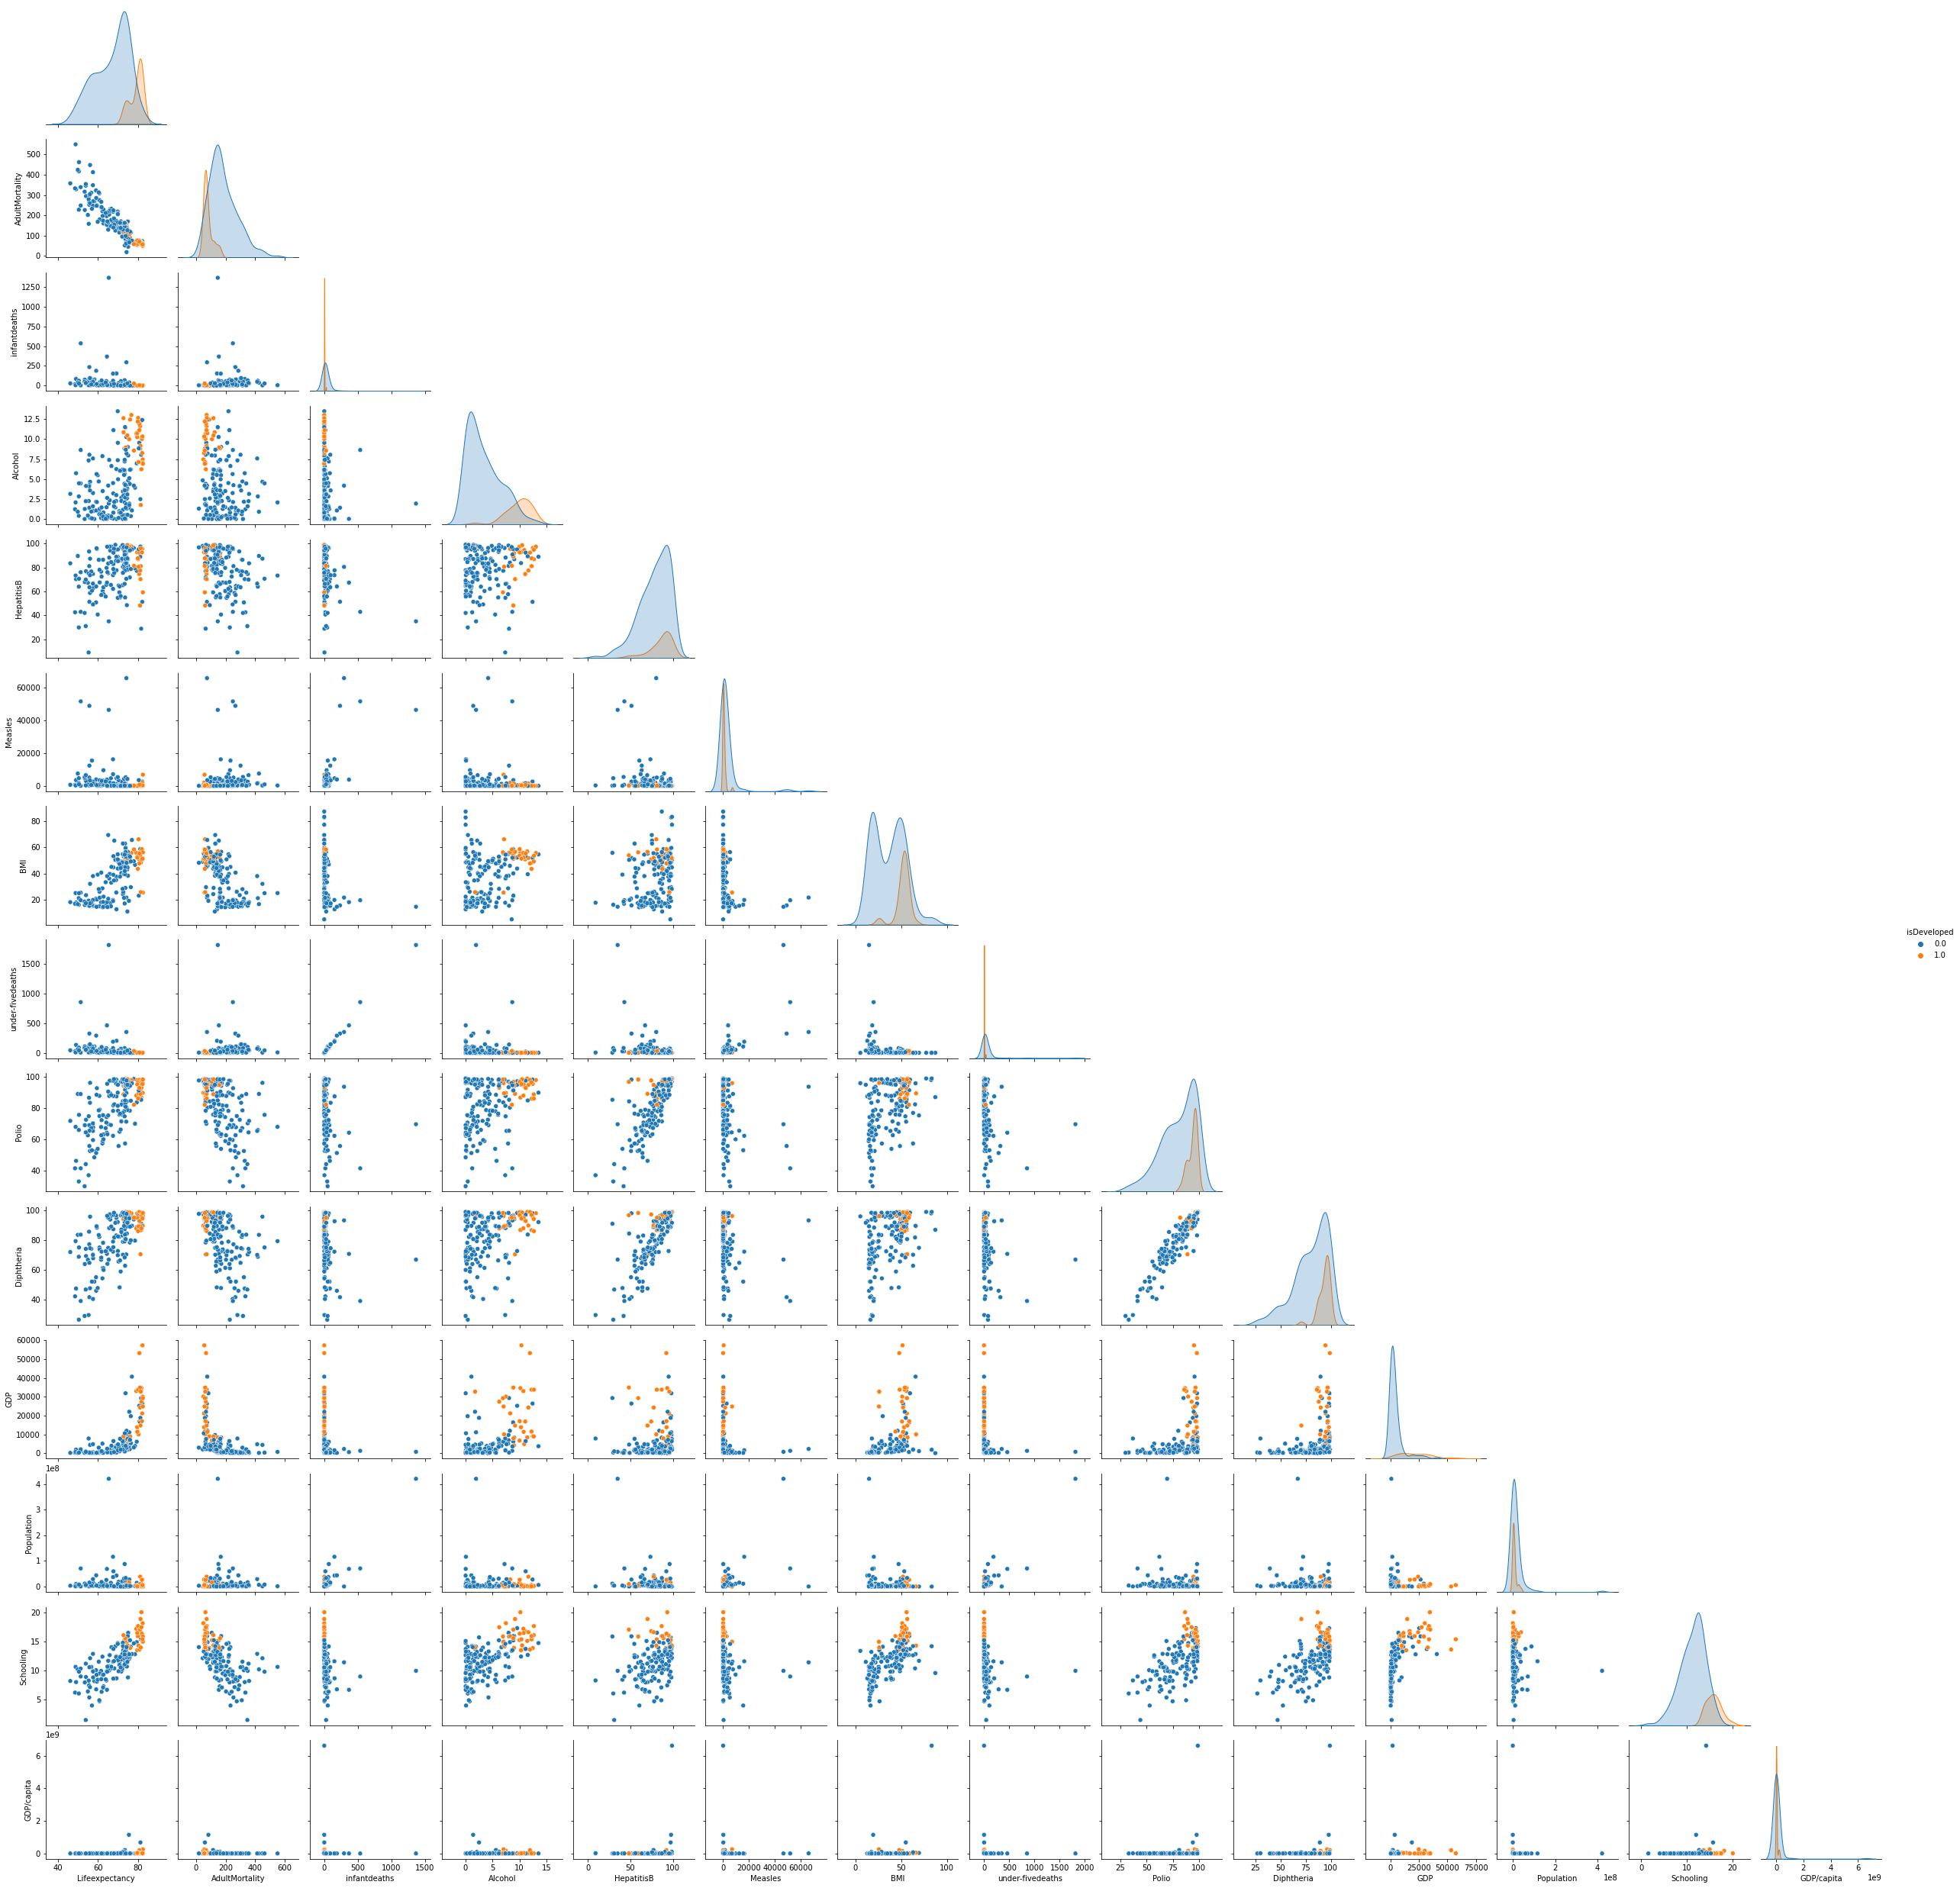

In [30]:
#Visualize correlations. 
sns.pairplot(dfLE, dropna=True, kind="scatter", hue= 'isDeveloped', corner = True)
plt.show()

<hr>
<h2>Part 5: Calculate correlations (25pts)</h2>
<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to believe any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

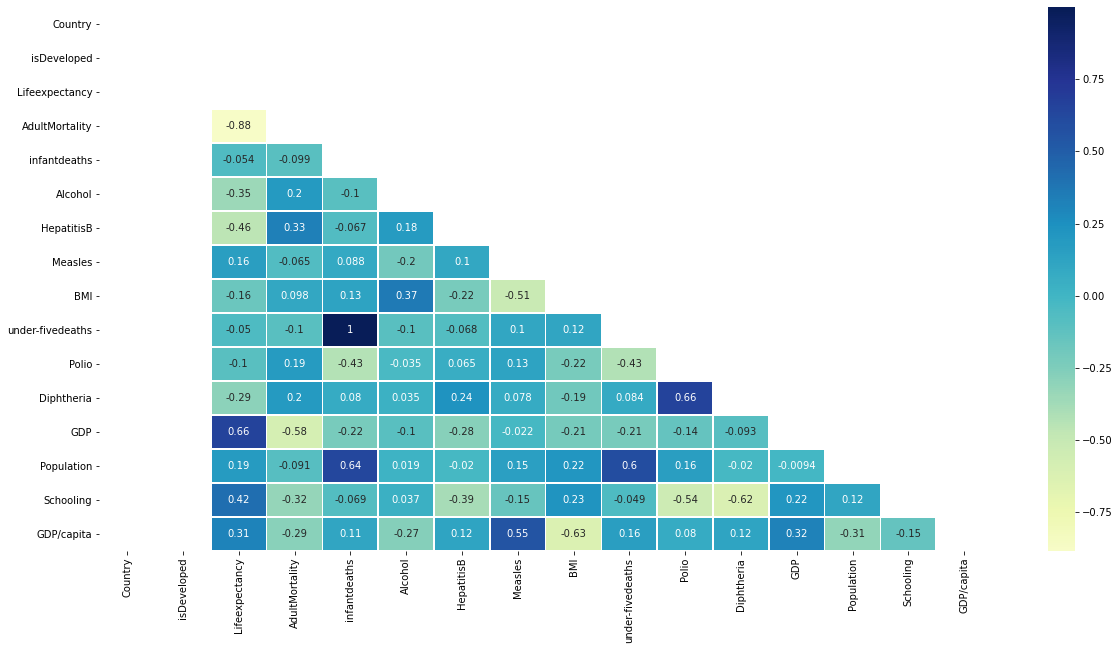

In [17]:
#Developed Map 

dfLE_dev = dfLE[dfLE['isDeveloped'] == 1]
#dfLE_dev.head(10)

dfLE_dev = dfLE_dev.apply(pd.to_numeric, errors='coerce')
dfLE_dev = dfLE_dev.corr()
#dfLE_dev.head()

#Show Correlations in heatmap
plt.rcParams["figure.figsize"] = (20,10)

mask_dev = np.triu(np.ones_like(dfLE_dev, dtype=bool))
#removes duplicate data comparisons

sns.heatmap(dfLE_dev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask_dev)
plt.show()

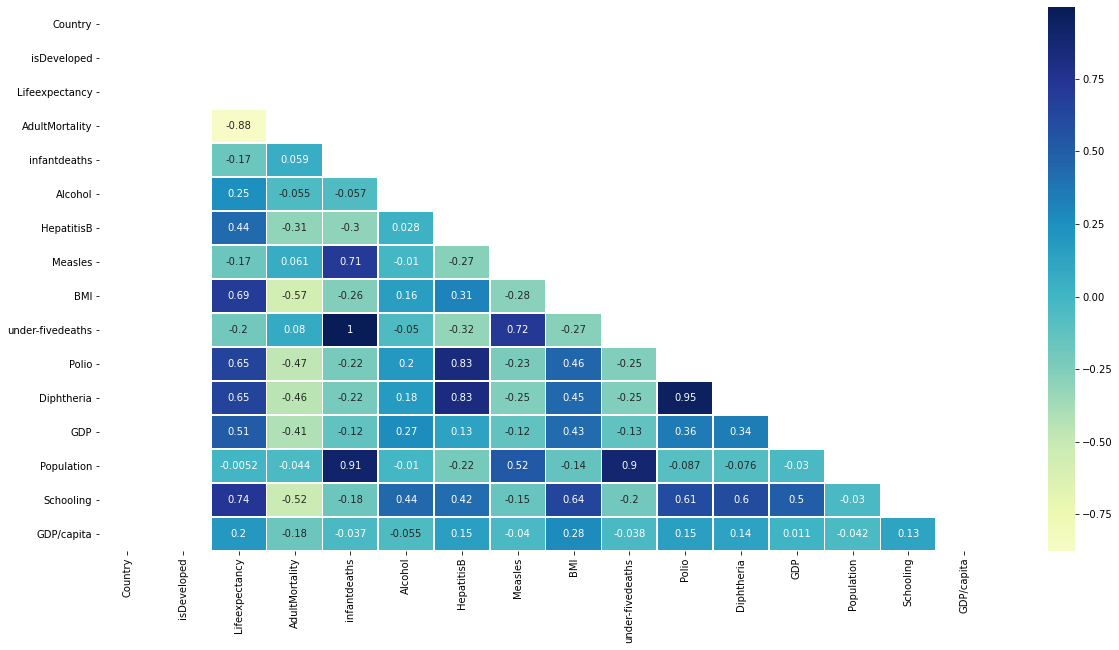

In [18]:
#UnDeveloped Map 

dfLE_undev = dfLE[dfLE['isDeveloped'] == 0]
#dfLE_undev.head(10)

dfLE_undev = dfLE_undev.apply(pd.to_numeric, errors='coerce')
dfLE_undev = dfLE_undev.corr()
#dfLE_undev.head()

#Show Correlations in heatmap
plt.rcParams["figure.figsize"] = (20,10)

mask_undev = np.triu(np.ones_like(dfLE_undev, dtype=bool))
#removes duplicate data comparisons

sns.heatmap(dfLE_undev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask_undev)
plt.show()

The three strongest correlations for Developed countries regarding life expectancy are:
<li> AdultMortality (Neg. corr.)
<li> GDP (Pos. corr.)
<li> HepB (Neg. corr.)

These correlations seem to track with what is reality in developed countries.
<li> As you increase in age, your life expectancy should be shorter.
<li> As the nation's GDP increases, life expectancy has trended higher.

The three strongest correlations for Developing countries regarding life expectancy are:
<li> AdultMortality (Neg. corr.)
<li> Schooling (Pos. corr.)
<li> BMI (Pos. corr.)

These correlations seem to track with what is reality in developing countries. 
<li> As you increase in age, your life expectancy should be shorter.
<li> Citizen's with lesser education degree are generally expected to not live as long as educated people.
<li> BMI can be used to very loosely base general health of a person, if the BMI of the nation's citizen is lower, then life expectancy could trend lower.

2 correlations that are drastically different between developed and developing nations are:
<li> Hepatitus B: Developing being a Positive correlation with life expectancy and the Developed being a Negative correlation.
<li> Alcohol: Developing being a Positive correlation with life expectancy and the Developed being a Negative correlation.

Positive correlations means that with one value increasing, the other has higher chance to also occur. The opposite is true for Negative correlations.
<li> These trends can be taken as in developed nations, alcoholism chances decrease as citizens live longer. The opposite would be true for developing nations then.
<li> The same can be said for HepB in developed vs. developing nations. The longer the citizen lives, the higher chance they have to be exposed and contract HepB in developing nations.

What would be needed to confirm this theory is data collected that collected the age of people that died from alcoholism and HepB in developed vs. developing nations.